# Experiments and Results

------------------------------------

### Set up

In [4]:
from src.optimizers.SAMTrainer import SAMTrainer
from src.optimizers.SimpleTrainer import SimpleTrainer
from src.utils.LabelNoiseDataset import LabelNoiseDataset
%load_ext autoreload
%autoreload 2
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [5]:
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

from src.utils import dataset
from src.utils import evaluation
from src.optimizers.SimpleTrainer import SimpleTrainer

In [6]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

### Utils

##### Plotting


In [7]:
def display_MNIST():
    mnist_train, mnist_val = dataset.get_mnist_dataset()
    fig, axs = plt.subplots(1,10)
    fig.set_figwidth(15)
    for i in range(10):
        axs[i].set_axis_off()
        axs[i].imshow(mnist_train[i][0].numpy().reshape((28,28)), cmap="gray")

def display_fashionMNIST():
    fashion_mnist_train, fashion_mnist_val = dataset.get_fashion_mnist_dataset()
    fig, axs = plt.subplots(1,10)
    fig.set_figwidth(15)
    for i in range(10):
        axs[i].set_axis_off()
        axs[i].imshow(fashion_mnist_train[i][0].numpy().reshape((28,28)), cmap="gray")



##### Training

In [30]:
def get_trained_adam_generator(
        loss_obj: float = 1e-8,
        max_iters: int = 500,
        lr: float = 1e-4):

    def trained_adam_generator(
            model: torch.nn.Sequential,
            training_set: torch.utils.data.Dataset,
            validation_set: torch.utils.data.Dataset,):

        base_trainer = SimpleTrainer(model, quiet=True, device=DEVICE)
        base_trainer.train(training_set, validation_set, loss_obj, max_iters=max_iters, lr=lr)
        return base_trainer.result()
    return trained_adam_generator

def get_trained_sam():...

def get_trained_pgd():...

def get_trained__():...


##### Evaluation

In [9]:
def evaluate_accuracy(model, training_set, validation_set):
    training_acc = evaluation.evaluate_accuracy(model, training_set, device=DEVICE)
    validation_acc = evaluation.evaluate_accuracy(model, validation_set, device=DEVICE)

    return training_acc, validation_acc

def evaluate_model_adversarial(model, training_set, validation_set):...


##### Experiment

In [49]:
def experiment(model_generator, trained_model_generator, training_set, validation_set, rounds:int = 2, fgsm_epsilon: float = 1e-3):

    #progress_bar = tqdm(range(rounds))

    training_accs = []
    validation_accs = []
    fgsm_accs = []

    for i in range(rounds) : #progress_bar:


        trained_model = trained_model_generator(model_generator(), training_set, validation_set)
        training_acc = evaluation.evaluate_accuracy(training_set, trained_model, device=DEVICE)
        validation_acc = evaluation.evaluate_accuracy(validation_set, trained_model, device=DEVICE)
        fgsm_acc = evaluation.evaluate_fgsm_accuracy(validation_set, trained_model, device=DEVICE, epsilon=fgsm_epsilon)

        training_accs.append(training_acc)
        validation_accs.append(validation_acc)
        fgsm_accs.append(fgsm_acc)


        print('Round : ' +str(i+1) + '/' + str(rounds) + ' Last training accuracy : ' + str(training_acc) + ', Last validation accuracy : ' + str(validation_acc) + ', Last fgsm accuracy : ' + str(fgsm_acc))
        #progress_bar.set_postfix({
        #    'Last training accuracy' : training_acc,
        #    'Last validation accuracy' : validation_acc,
        #    'Last fgsm accuracy' : fgsm_acc,
        #})


### Datasets

--Comments--

##### MNIST

--DS Description--

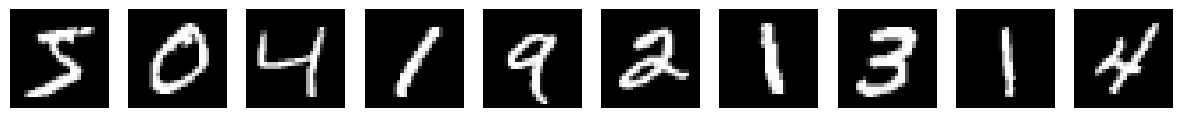

In [11]:
display_MNIST()
print()

##### FashionMNIST

--DS Description--

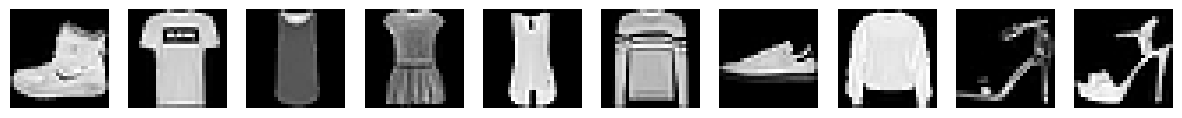

In [12]:
display_fashionMNIST()
print()

##### SVHN

--DS Description--

In [8]:
# Display some sample of the ds

### Model definition

--Comments and model description--

In [19]:
def get_model(output_dim=10):
    """Returns a simple CNN model."""
    model = torch.nn.Sequential(
        torch.nn.Conv2d(1, 8, kernel_size=5, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Conv2d(8, 1, kernel_size=5, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.Flatten(),
        torch.nn.Linear(576, output_dim),
    ).to(DEVICE)
    return model

### Experiments
------------------------
### MNIST


In [14]:
mnist_train, mnist_val = dataset.get_mnist_dataset()

##### ADAM Baseline

In [50]:
experiment(get_model, get_trained_adam_generator(max_iters=100), mnist_train, mnist_val, rounds=5)

Round : 1/2 Last training accuracy : 0.11300000548362732, Last validation accuracy : 0.11900000274181366, Last fgsm accuracy : 0.1145000085234642
Round : 2/2 Last training accuracy : 0.10050000250339508, Last validation accuracy : 0.10850000381469727, Last fgsm accuracy : 0.09850000590085983
